# Lab_05 - Sieci Neuronowe

## Zadanie 1

Napisz prostą funkcję, która sprawdzi czy sieć działa dobrze tj.  funkcja forwardPass  na input dostanie wiek, wagę, wzrost, a na output zwróci liczbę przewidującą granie w siatkówkę. Wagi z sieci pobierz z rysunku w tym pdf (dużo przepisywania) Uwaga! W powyższym modelu funkcja aktywacji nie działa na neuronie output, tylko na dwóch neuronach ukrytych (hidden). Wystarczy uzupełnić miejsca z wielokropkiem. 

In [19]:
import math


def sigmoid(x):
    return 1 / (1 + math.exp(-x))


def forwardPass(wiek, waga, wzrost):
    hidden1 = (wiek * -0.46122) + (waga * 0.97314) + (wzrost * -0.39203) + 0.80109
    hidden1_po_aktywacji = sigmoid(hidden1)
    hidden2 = (wiek * 0.78548) + (waga * 2.10584) + (wzrost * -0.57847) + 0.43529
    hidden2_po_aktywacji = sigmoid(hidden2)
    output = (
        (hidden1_po_aktywacji * -0.81546) + (hidden2_po_aktywacji * 1.03775) + -0.2368
    )
    return output

In [20]:
# forwardPass(23,75,176) = 0.798528
print(forwardPass(23, 75, 176))

0.7985341880063129


## Zadanie 2

In [48]:
# load iris dataset from sklearn
from sklearn import datasets

iris = datasets.load_iris()

# for all predictions
max_iter = 10000
random_state = 99


# split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data[:, [0, 1, 2, 3]], iris.target, test_size=0.3, random_state=42
)

# construct neural network with 4 inputs, 1 hidden layer with 2 neurons and 1 output
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(2,), max_iter=max_iter, random_state=random_state
)

# train the model
mlp.fit(X_train, y_train)

# predict the test set
y_pred = mlp.predict(X_test)

# accuracy in percent
from sklearn.metrics import accuracy_score

print(
    f"Accuracy for NN with params: (4,2,1) = {accuracy_score(y_test, y_pred)*100:.2f}%"
)

# for comparison construct neural network with 4 inputs, 1 hidden layers with 3 neurons and 1 output
mlp = MLPClassifier(
    hidden_layer_sizes=(3,), max_iter=max_iter, random_state=random_state
)

# train the model
mlp.fit(X_train, y_train)

# predict the test set
y_pred = mlp.predict(X_test)

# accuracy in percent
print(
    f"Accuracy for NN with params: (4,3,1) = {accuracy_score(y_test, y_pred)*100:.2f}%"
)

# for comparison construct neural network with 4 inputs, 2 hidden layers with 3 neurons each and 1 output
mlp = MLPClassifier(
    hidden_layer_sizes=(3, 3), max_iter=max_iter, random_state=random_state
)

# train the model
mlp.fit(X_train, y_train)

# predict the test set
y_pred = mlp.predict(X_test)

# accuracy in percent
print(
    f"Accuracy for NN with params: (4,3,3,1) = {accuracy_score(y_test, y_pred)*100:.2f}%"
)

Accuracy for NN with params: (4,2,1) = 71.11%
Accuracy for NN with params: (4,3,1) = 77.78%
Accuracy for NN with params: (4,3,3,1) = 97.78%


## Zadanie 3

Accuracy for NN with params: (8,6,3,1) = 66.23%


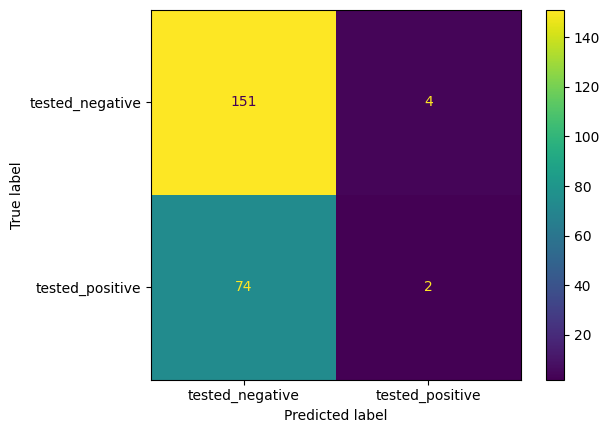

In [12]:
# import diabetes dataset
import pandas as pd

diabetes = pd.read_csv("data/diabetes.csv")

random_state = 99
max_iter = 1500


# split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.drop("class", axis=1),
    diabetes["class"],
    test_size=0.3,
    random_state=random_state,
)


# RELU activation function
def relu(x):
    return max(0, x)


# construct neural network with 8 inputs, 2 hidden layers, first with 6 neurons and second 3 and 1 output
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(6, 3),
    max_iter=max_iter,
    random_state=random_state,
    activation="relu",
)

# train the model
mlp.fit(X_train, y_train)

# predict the test set
y_pred = mlp.predict(X_test)

# accuracy in percent
from sklearn.metrics import accuracy_score

print(
    f"Accuracy for NN with params: (8,6,3,1) = {accuracy_score(y_test, y_pred)*100:.2f}%"
)

# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

## Zadanie 4

In [51]:
# import diabetes dataset
import pandas as pd

diabetes = pd.read_csv("data/diabetes.csv")

# replace tested positive and tested negative with 1 and 0
diabetes["class"] = diabetes["class"].replace("tested_positive", 1)
diabetes["class"] = diabetes["class"].replace("tested_negative", 0)

random_state = 99
max_iter = 1

# split data into train and test sets using keras
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.iloc[:, :-1], diabetes.iloc[:, -1], test_size=0.3
)

# RELU activation function
def relu(x):
    return max(0, x)

# construct neural network with 8 inputs, 2 hidden layers, first with 6 neurons and second 3 and 1 output 
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(6, input_dim=8, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

loss_fun_arr = ["KLD", "MAE", "MSE", "MSLE", "hinge", "huber", "kl_divergence", "kld", "squared_hinge"]
optimizer_arr = ["Adadelta", "Adagrad", "Adam", "Adamax", "Ftrl", "Nadam", "RMSprop", "SGD"]
act_fun_arr = ["softmax", "softplus", "softsign", "relu", "tanh", "sigmoid", "hard_sigmoid", "linear"]

# train the model
results = {}
# for loss_fun in loss_fun_arr:
#     for optimizer in optimizer_arr:
#         for act_fun in act_fun_arr:
#             model = Sequential()
#             model.add(Dense(6, input_dim=8, activation=act_fun))
#             model.add(Dense(3, activation=act_fun))
#             model.add(Dense(1, activation="sigmoid"))
#             model.compile(loss=loss_fun, metrics=["accuracy"], optimizer=optimizer)
#             model.fit(X_train, y_train, epochs=max_iter, verbose=0)
#             # predict the test set
#             y_pred = model.predict(X_test)
#             # accuracy in percent
#             from sklearn.metrics import accuracy_score
#             results[(loss_fun, optimizer, act_fun)] = accuracy_score(y_test, y_pred.round())*100

results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

for key, value in list(results.items())[:10]:
    print(f"Accuracy for NN with params: {key} = {value:.2f}%")


10 najlepszych kombinacji (loss, optimizer, activation fun):

Accuracy for NN with params: ('MSLE', 'SGD', 'relu') = 69.26%
Accuracy for NN with params: ('kld', 'Adadelta', 'softplus') = 68.40%
Accuracy for NN with params: ('KLD', 'Adam', 'relu') = 67.53%
Accuracy for NN with params: ('KLD', 'Adamax', 'softplus') = 67.53%
Accuracy for NN with params: ('KLD', 'RMSprop', 'hard_sigmoid') = 67.53%
Accuracy for NN with params: ('huber', 'Adadelta', 'softsign') = 67.53%
Accuracy for NN with params: ('huber', 'Adagrad', 'softsign') = 67.53%
Accuracy for NN with params: ('KLD', 'Adadelta', 'hard_sigmoid') = 67.10%
Accuracy for NN with params: ('KLD', 'Adagrad', 'softmax') = 67.10%
Accuracy for NN with params: ('KLD', 'Adagrad', 'softsign') = 67.10%

Epoch 1/300
17/17 [==============================] - 0s 5ms/step - loss: 0.1519 - accuracy: 0.6741 - val_loss: 0.1943 - val_accuracy: 0.5758
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.6760 - val_loss: 0.1829 - val_accuracy: 0.5844
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.6723 - val_loss: 0.1765 - val_accuracy: 0.5844
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.6797 - val_loss: 0.1739 - val_accuracy: 0.5844
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.6797 - val_loss: 0.1726 - val_accuracy: 0.5844
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.6797 - val_loss: 0.1720 - val_accuracy: 0.5844
Epoch 7/300
17/17 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.6797 - val_loss: 0.1714 - val_accuracy: 0.5844
Epoch 8/300
1

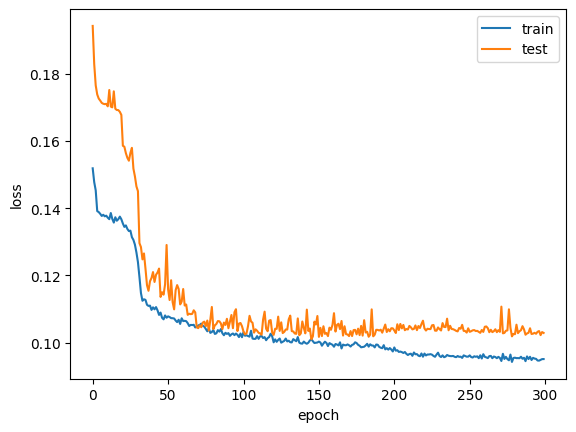

In [56]:
max_iter = 300

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(6, input_dim=8, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="MSLE", metrics=["accuracy"], optimizer="SGD")

history = model.fit(X_train, y_train, epochs=max_iter, validation_data=(X_test, y_test), shuffle=True)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Accouracy for params: {act_fun}, {loss_fun}, {opt_fun} = {accuracy_score(y_test, y_pred.round())*100:.2f}%")

from matplotlib import pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/300
17/17 [==============================] - 0s 5ms/step - loss: 5.1626 - accuracy: 0.6797 - val_loss: 6.6984 - val_accuracy: 0.5844
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 5.1626 - accuracy: 0.6797 - val_loss: 6.6984 - val_accuracy: 0.5844
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 5.1626 - accuracy: 0.6797 - val_loss: 6.6984 - val_accuracy: 0.5844
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 5.1626 - accuracy: 0.6797 - val_loss: 6.6984 - val_accuracy: 0.5844
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 5.1599 - accuracy: 0.6797 - val_loss: 6.6945 - val_accuracy: 0.5844
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 5.1479 - accuracy: 0.6797 - val_loss: 6.6518 - val_accuracy: 0.5844
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 4.7454 - accuracy: 0.6797 - val_loss: 4.4987 - val_accuracy: 0.5844
Epoch 8/300
1

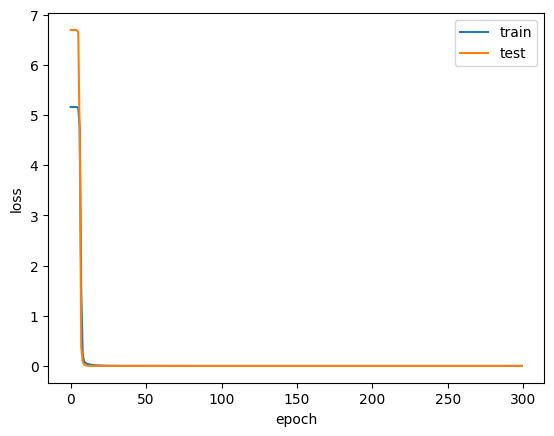

In [65]:
# 'kld', 'Adadelta', 'softplus'

max_iter = 300

act_fun = "softplus"
loss_fun = "KLD"
opt_fun = "Adam"

model = Sequential()
model.add(Dense(6, input_dim=8, activation=act_fun))
model.add(Dense(3, activation=act_fun))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss=loss_fun, metrics=["accuracy"], optimizer=opt_fun)

history = model.fit(X_train, y_train, epochs=max_iter, validation_data=(X_test, y_test), shuffle=True)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Accouracy for params: {act_fun}, {loss_fun}, {opt_fun} = {accuracy_score(y_test, y_pred.round())*100:.2f}%")

from matplotlib import pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.3520 - val_loss: 0.2882 - val_accuracy: 0.4459
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.3389 - val_loss: 0.2828 - val_accuracy: 0.4329
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.3371 - val_loss: 0.2784 - val_accuracy: 0.4242
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.3352 - val_loss: 0.2746 - val_accuracy: 0.4286
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.3315 - val_loss: 0.2712 - val_accuracy: 0.4286
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.3259 - val_loss: 0.2681 - val_accuracy: 0.4286
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.3222 - val_loss: 0.2650 - val_accuracy: 0.4286
Epoch 8/300
1

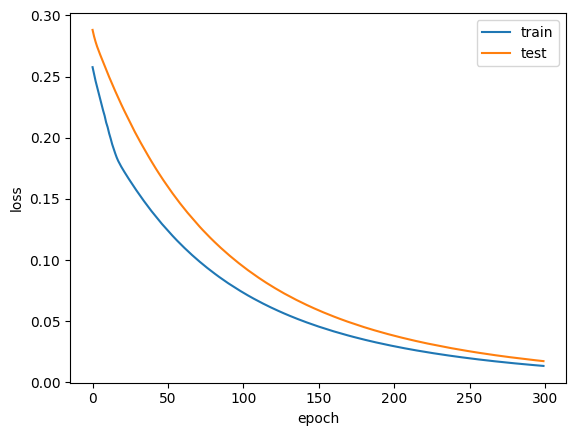

In [59]:
# "KLD", "Adam", "relu"


act_fun = "relu"
loss_fun = "KLD"
opt_fun = "Adam"

model = Sequential()
model.add(Dense(6, input_dim=8, activation=act_fun))
model.add(Dense(3, activation=act_fun))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss=loss_fun, metrics=["accuracy"], optimizer=opt_fun)

history = model.fit(X_train, y_train, epochs=max_iter, validation_data=(X_test, y_test), shuffle=True)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Accouracy for params: {act_fun}, {loss_fun}, {opt_fun} = {accuracy_score(y_test, y_pred.round())*100:.2f}%")

from matplotlib import pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

### Wizualizacja sieci neuronowej

In [17]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           8
               Dense   XXXXX -------------------        54    68.4%
                relu   #####           6
               Dense   XXXXX -------------------        21    26.6%
                relu   #####           3
               Dense   XXXXX -------------------         4     5.1%
             sigmoid   #####           1
